This notebook contains derivation of BCs, IC and g for example based on

Antonietti, P., & Quarteroni, A. (2013). Numerical performance of discontinuous and stabilized continuous Galerkin methods for convection–diffusion problems. Numerical Methods for Hyperbolic Equations, 75–85. https://doi.org/10.1201/b14172-9

### Solution

In [3]:
var("x_1, x_2, t, u, eps")
# solution is
u(x_1, x_2) = -atan(((x_1 - 1/2)^2 + (x_2 - 1/2)^2 - 1/16)/sqrt(eps) )
u

(x_1, x_2) |--> -arctan(1/16*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)/sqrt(eps))

In [4]:
latex(u)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ -\arctan\left(\frac{4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1}{16 \, \sqrt{\mathit{eps}}}\right)

In [5]:
du_1 = diff(u, x_1)
du_1

(x_1, x_2) |--> -256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

In [6]:
du_2 = diff(u, x_2)
du_2

(x_1, x_2) |--> -256*(2*x_2 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

### Initial condition

In [7]:
u(t=0)

-arctan(1/16*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)/sqrt(eps))

### Boundary conditions

In [8]:
# boundaries
top = 1
left = 0; right = 1
bottom = 0

In [9]:
# left
u(x_1 = left)

-arctan(1/16*(4*(2*x_2 - 1)^2 + 3)/sqrt(eps))

In [10]:
# left du
(du_1(x_1=left), du_2(x_1=left))

(256/(((4*(2*x_2 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)),
 -256*(2*x_2 - 1)/(((4*(2*x_2 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)))

In [11]:
# right
u(x_1 = right)

-arctan(1/16*(4*(2*x_2 - 1)^2 + 3)/sqrt(eps))

In [12]:
# right du
(du_1(x_1=right), du_2(x_1=right))

(-256/(((4*(2*x_2 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)),
 -256*(2*x_2 - 1)/(((4*(2*x_2 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)))

In [13]:
# bottom
u(x_2 = bottom)

-arctan(1/16*(4*(2*x_1 - 1)^2 + 3)/sqrt(eps))

In [14]:
# bottom du
(du_1(x_2=bottom), du_2(x_2=bottom))

(-256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)),
 256/(((4*(2*x_1 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)))

In [15]:
# top
u(x_2 = top)

-arctan(1/16*(4*(2*x_1 - 1)^2 + 3)/sqrt(eps))

In [16]:
# top du
(du_1(x_2=top), du_2(x_2=top))

(-256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)),
 -256/(((4*(2*x_1 - 1)^2 + 3)^2/eps + 256)*sqrt(eps)))

### Right hand side $g$

In [17]:
diff(u, t)

(x_1, x_2) |--> 0

In [18]:
diff(u, x_1)

(x_1, x_2) |--> -256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

In [19]:
diff(u, x_1, 2)

(x_1, x_2) |--> 8192*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)*(2*x_1 - 1)^2/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)^2*eps^(3/2)) - 512/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

In [20]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
g = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2)) + (diff(u, x_1) + diff(u, x_2))
g

(x_1, x_2) |--> -1024*eps*(8*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)*(2*x_1 - 1)^2/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)^2*eps^(3/2)) + 8*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)*(2*x_2 - 1)^2/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)^2*eps^(3/2)) - 1/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))) - 256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps)) - 256*(2*x_2 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

In [21]:
simplify(g)

(x_1, x_2) |--> -1024*eps*(8*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)*(2*x_1 - 1)^2/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)^2*eps^(3/2)) + 8*(4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)*(2*x_2 - 1)^2/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)^2*eps^(3/2)) - 1/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))) - 256*(2*x_1 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps)) - 256*(2*x_2 - 1)/(((4*(2*x_1 - 1)^2 + 4*(2*x_2 - 1)^2 - 1)^2/eps + 256)*sqrt(eps))

In [22]:
latex(g)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ -1024 \, \mathit{eps} {\left(\frac{8 \, {\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)} {\left(2 \, x_{1} - 1\right)}^{2}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)}^{2} \mathit{eps}^{\frac{3}{2}}} + \frac{8 \, {\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)} {\left(2 \, x_{2} - 1\right)}^{2}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)}^{2} \mathit{eps}^{\frac{3}{2}}} - \frac{1}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)} \sqrt{\mathit{eps}}}\right)} - \frac{256 \, {\left(2 \, x_{1} - 1\right)}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right

$$
\left( x_{1}, x_{2} \right) \ {\mapsto} \ -1024 \, \mathit{eps} {\left(\frac{8 \, {\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)} {\left(2 \, x_{1} - 1\right)}^{2}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)}^{2} \mathit{eps}^{\frac{3}{2}}} + \frac{8 \, {\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)} {\left(2 \, x_{2} - 1\right)}^{2}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)}^{2} \mathit{eps}^{\frac{3}{2}}} - \frac{1}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)} \sqrt{\mathit{eps}}}\right)} - \frac{256 \, {\left(2 \, x_{1} - 1\right)}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)} \sqrt{\mathit{eps}}} - \frac{256 \, {\left(2 \, x_{2} - 1\right)}}{{\left(\frac{{\left(4 \, {\left(2 \, x_{1} - 1\right)}^{2} + 4 \, {\left(2 \, x_{2} - 1\right)}^{2} - 1\right)}^{2}}{\mathit{eps}} + 256\right)} \sqrt{\mathit{eps}}}
$$

In [23]:
g.simplify_trig()

(x_1, x_2) |--> -512*(256*eps*x_1^5 + 256*eps*x_2^5 + 256*(2*eps^2 - 3*eps)*x_1^4 + 256*(2*eps^2 + eps*x_1 - 3*eps)*x_2^4 - 32*(32*eps^2 - 31*eps)*x_1^3 + 32*(16*eps*x_1^2 - 32*eps^2 - 32*eps*x_1 + 31*eps)*x_2^3 - 512*eps^3 + 64*(16*eps^2 - 11*eps)*x_1^2 + 32*(16*eps*x_1^3 + 16*(2*eps^2 - 3*eps)*x_1^2 + 32*eps^2 - (32*eps^2 - 47*eps)*x_1 - 22*eps)*x_2^2 - 130*eps^2 - (256*eps^2 - 273*eps)*x_1 + (256*eps*x_1^4 - 1024*eps*x_1^3 - 32*(32*eps^2 - 47*eps)*x_1^2 - 256*eps^2 + 64*(16*eps^2 - 15*eps)*x_1 + 273*eps)*x_2 - 49*eps)/((65536*x_1^8 + 65536*x_2^8 - 262144*x_1^7 + 16384*(16*x_1^2 - 16*x_1 + 31)*x_2^6 - 262144*x_2^7 + 507904*x_1^6 - 16384*(48*x_1^2 - 48*x_1 + 37)*x_2^5 + 512*(256*eps + 947)*x_1^4 - 606208*x_1^5 + 512*(768*x_1^4 - 1536*x_1^3 + 2976*x_1^2 + 256*eps - 2208*x_1 + 947)*x_2^4 - 1024*(256*eps + 259)*x_1^3 - 1024*(768*x_1^4 - 1536*x_1^3 + 1696*x_1^2 + 256*eps - 928*x_1 + 259)*x_2^3 + 64*(3840*eps + 1519)*x_1^2 + 64*(4096*x_1^6 - 12288*x_1^5 + 23808*x_1^4 + 16*(256*eps + 1203)*

In [24]:
g.expand()

(x_1, x_2) |--> -524288*x_1^4/((65536*x_1^8/eps^2 + 262144*x_1^6*x_2^2/eps^2 + 393216*x_1^4*x_2^4/eps^2 + 262144*x_1^2*x_2^6/eps^2 + 65536*x_2^8/eps^2 - 262144*x_1^7/eps^2 - 262144*x_1^6*x_2/eps^2 - 786432*x_1^5*x_2^2/eps^2 - 786432*x_1^4*x_2^3/eps^2 - 786432*x_1^3*x_2^4/eps^2 - 786432*x_1^2*x_2^5/eps^2 - 262144*x_1*x_2^6/eps^2 - 262144*x_2^7/eps^2 + 507904*x_1^6/eps^2 + 786432*x_1^5*x_2/eps^2 + 1523712*x_1^4*x_2^2/eps^2 + 1572864*x_1^3*x_2^3/eps^2 + 1523712*x_1^2*x_2^4/eps^2 + 786432*x_1*x_2^5/eps^2 + 507904*x_2^6/eps^2 + 131072*x_1^4/eps - 606208*x_1^5/eps^2 - 1130496*x_1^4*x_2/eps^2 + 262144*x_1^2*x_2^2/eps - 1736704*x_1^3*x_2^2/eps^2 - 1736704*x_1^2*x_2^3/eps^2 + 131072*x_2^4/eps - 1130496*x_1*x_2^4/eps^2 - 606208*x_2^5/eps^2 - 262144*x_1^3/eps + 484864*x_1^4/eps^2 - 262144*x_1^2*x_2/eps + 950272*x_1^3*x_2/eps^2 - 262144*x_1*x_2^2/eps + 1231872*x_1^2*x_2^2/eps^2 - 262144*x_2^3/eps + 950272*x_1*x_2^3/eps^2 + 484864*x_2^4/eps^2 + 245760*x_1^2/eps - 265216*x_1^3/eps^2 + 262144*x_1*x_2

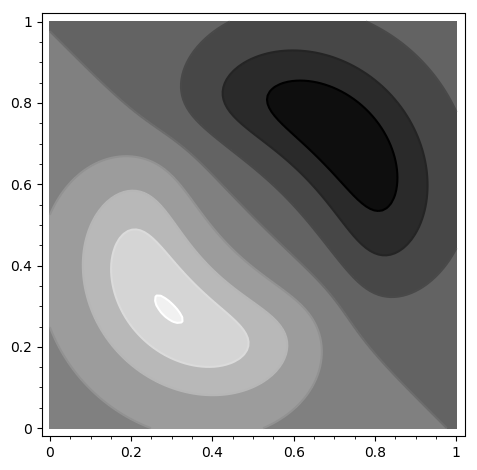

In [23]:
contour_plot(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1))

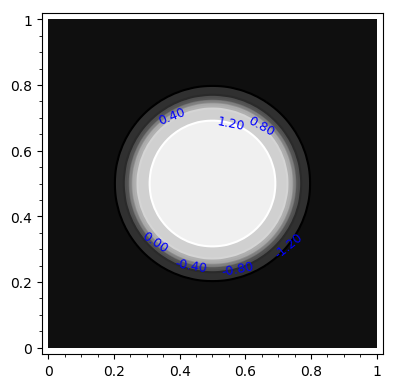

In [28]:
contour_plot(u(eps=1e-4), (x_1, 0,1), (x_2, 0,1), labels=True)

In [26]:
plot3d(u(eps=1e-4), (x_1, 0,1), (x_2, 0,1))

Graphics3d Object